# Social Media 'Addictiveness Score' Prediction ---> by NIDHIARASU

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

#Loading the DataSet
data = pd.read_csv(r"C:\Users\rajin\OneDrive\Desktop\Projects\Data Science\2025 - Students' Social Media Addiction\Students Social Media Addiction.csv")
print(data.head())
print(data.shape)


   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [2]:
# Selecting the useful columns alone
new_data = data[['Avg_Daily_Usage_Hours','Affects_Academic_Performance','Sleep_Hours_Per_Night','Mental_Health_Score','Conflicts_Over_Social_Media','Addicted_Score']]
print(new_data.head())

   Avg_Daily_Usage_Hours Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0                    5.2                          Yes                    6.5   
1                    2.1                           No                    7.5   
2                    6.0                          Yes                    5.0   
3                    3.0                           No                    7.0   
4                    4.5                          Yes                    6.0   

   Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
0                    6                            3               8  
1                    8                            0               3  
2                    5                            4               9  
3                    7                            1               4  
4                    6                            2               7  


In [3]:
#Changing String values of 'Affects_Academic_Performance' to integer values
new_data = new_data.copy()
new_data['Affects_Academic_Performance'] = new_data['Affects_Academic_Performance'].map({'Yes':1,'No':0})
print(new_data.head())

   Avg_Daily_Usage_Hours  Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0                    5.2                             1                    6.5   
1                    2.1                             0                    7.5   
2                    6.0                             1                    5.0   
3                    3.0                             0                    7.0   
4                    4.5                             1                    6.0   

   Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
0                    6                            3               8  
1                    8                            0               3  
2                    5                            4               9  
3                    7                            1               4  
4                    6                            2               7  


TRAIN-TEST SPLIT

In [4]:
from sklearn.model_selection import train_test_split

x = new_data.drop(['Addicted_Score'],axis = 1)
y = new_data['Addicted_Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(564, 5)
(564,)
(141, 5)
(141,)


MODEL INITIALIZATION AND MODEL EVALUATION

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("MAE :",mae)
print("MSE : ",mse)
print("R2 Score :",r2)

MAE : 0.24102613999778782
MSE :  0.10993440232784699
R2 Score : 0.9560664578941882


VISUAL CHECK


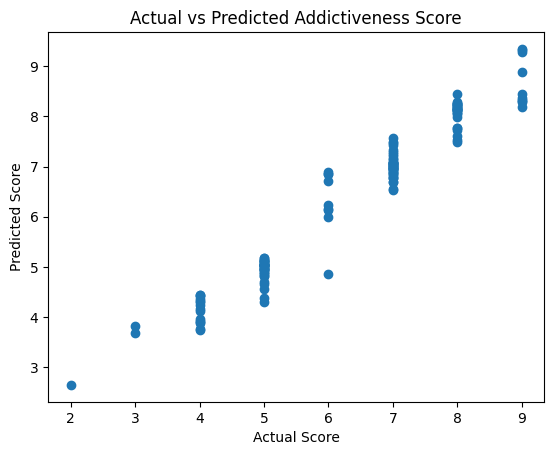

In [6]:
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Addictiveness Score')
plt.show()

Predicting 'Addictiveness Score' for custom values

In [11]:
custom = pd.DataFrame({
    'Avg_Daily_Usage_Hours':[6.5],
    'Affects_Academic_Performance':[1],#yes
    'Sleep_Hours_Per_Night':[3],
    'Mental_Health_Score':[5],
    'Conflicts_Over_Social_Media':[2],
})

custom_pred = model.predict(custom)
print("Addictiveness Score : ",round(custom_pred[0]))

Addictiveness Score :  8


THANK YOU.....